<a href="https://colab.research.google.com/github/protocol-streams/research/blob/main/Sam_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 10.4 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import hf_hub_download

chkpt_path = hf_hub_download("ybelkada/segment-anything", "checkpoints/sam_vit_b_01ec64.pth")

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-y178m0wn
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-y178m0wn
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=c288be32576a262a1be3834d4a53b6192a7c8cf6bca61789d6dc0b0b68d3f9ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-ujx490gq/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:
!pip install opencv-python pycocotools matplotlib onnxruntime onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.4 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from segment_anything import build_sam, SamPredictor 

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Sample_Test_Images/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "/content/drive/MyDrive/sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

(-0.5, 799.5, 533.5, -0.5)

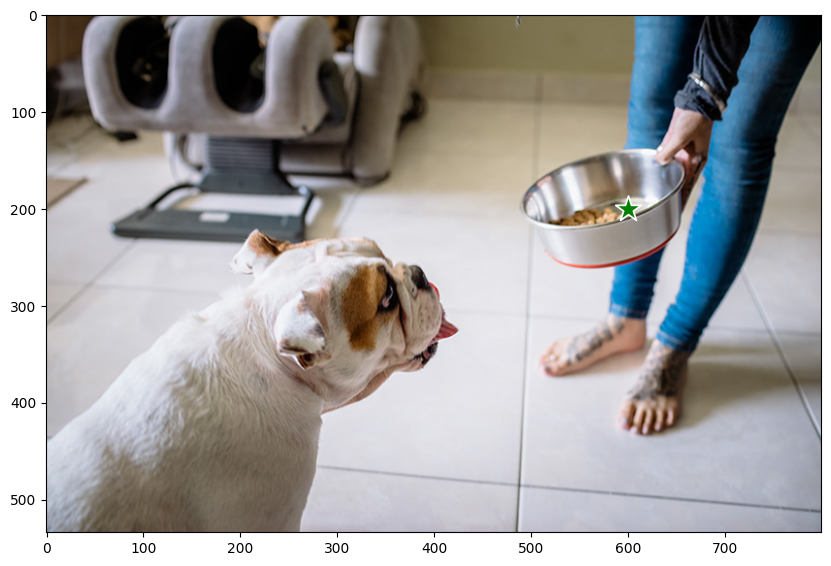

In [ ]:

predictor = SamPredictor(sam)

predictor.set_image(image)

input_point = np.array([[600, 200]])
input_label = np.array([1])

plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
#plt.savefig('output.png')


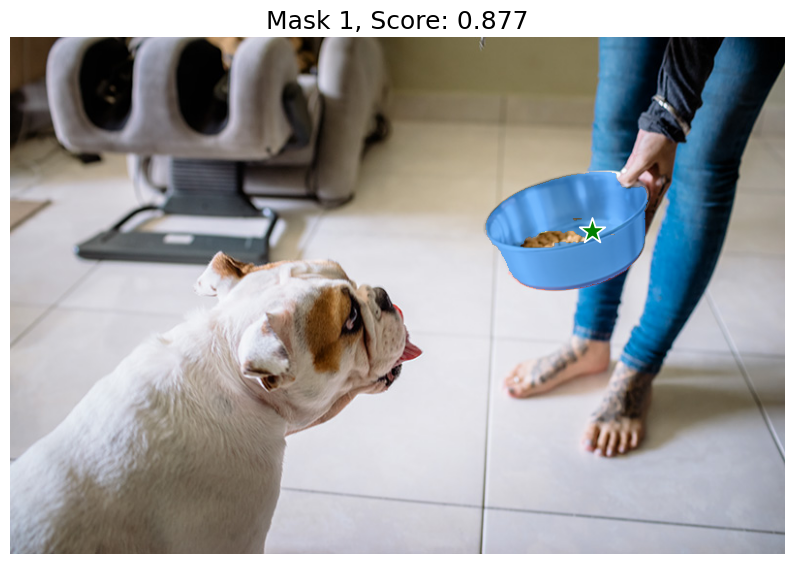

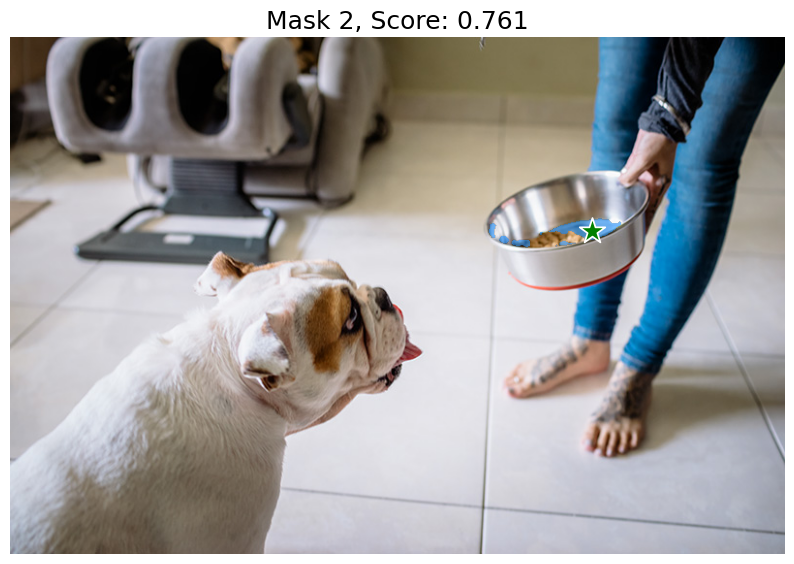

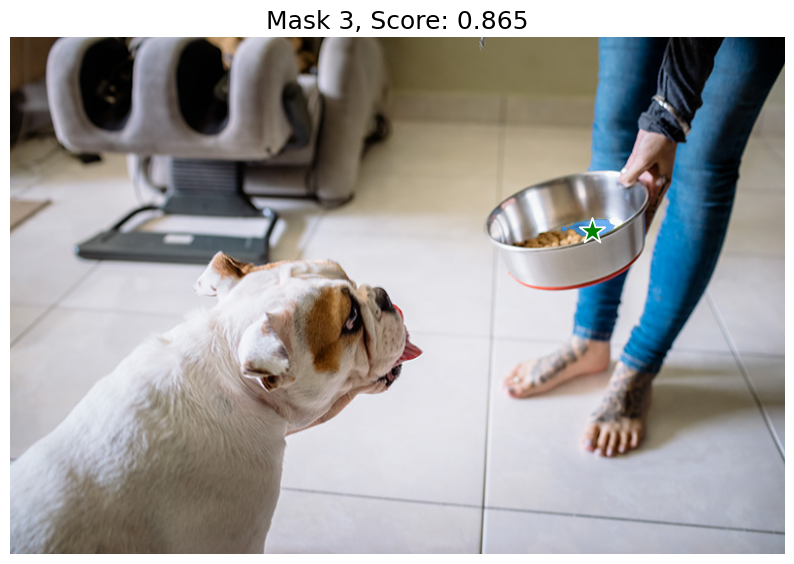

In [ ]:

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.savefig('output'+ str(i +1) +'.png')
    plt.show()  
  

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]
(3, 534, 800)
(534, 800, 3)


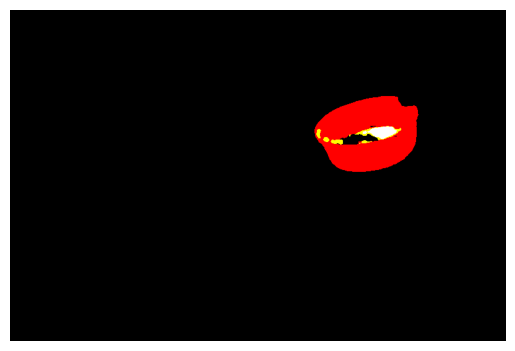

In [ ]:
from torchvision.transforms.autoaugment import F
print(masks)
print(masks.shape)

mask_new = np.random.randint(0,1, size=(3,534,800))

for i in range(masks.shape[0]):
  for j in range(masks.shape[1]):
    for k in range(masks.shape[2]):
      if masks[i,j,k] == True:
        mask_new[0,j,k] = 255
        mask_new[1,j,k] = 255
        mask_new[2,j,k] = 255
      else:
        mask_new[i,j,k] = 0

new_mask = np.transpose(mask_new, (1, 2, 0))
#new_mask = new_mask.astype(np.float32) / 255.0
print(new_mask.shape)

plt.imshow(new_mask)
plt.axis('off')  # Remove axes
plt.show()

In [ ]:
!pip3 install wldhx.yadisk-direct

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/advimman/lama.git

fatal: destination path 'lama' already exists and is not an empty directory.


In [ ]:
!pip install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade pip setuptools wheel
!pip install --upgrade numpy scipy cython



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pwd
%cd lama/

!pip install -r requirements.txt

In [ ]:
!pip install kornia

In [ ]:
#!pip install pytorch-lightning
#!pip install kornia

!pip install opencv-python
!pip install tensorflow
!pip install joblib
!pip install albumentations
!pip install hydra-core
!pip install tabulate
!pip install webdataset
!pip install packaging
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=be8e6c9c2e22a04407bfd3f5b723535d8fdd30e784267f12dfa0c96a46e3b105
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached webdataset-0.2.48-py3-none-any.whl (51 kB)
  Using cached braceexpand-0.1.7-py2.py3-none-any.whl (5.9 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd lama

/content/drive/MyDrive/lama


Will use /content/drive/MyDrive/Sample_Test_Images/dog.jpg for inpainting


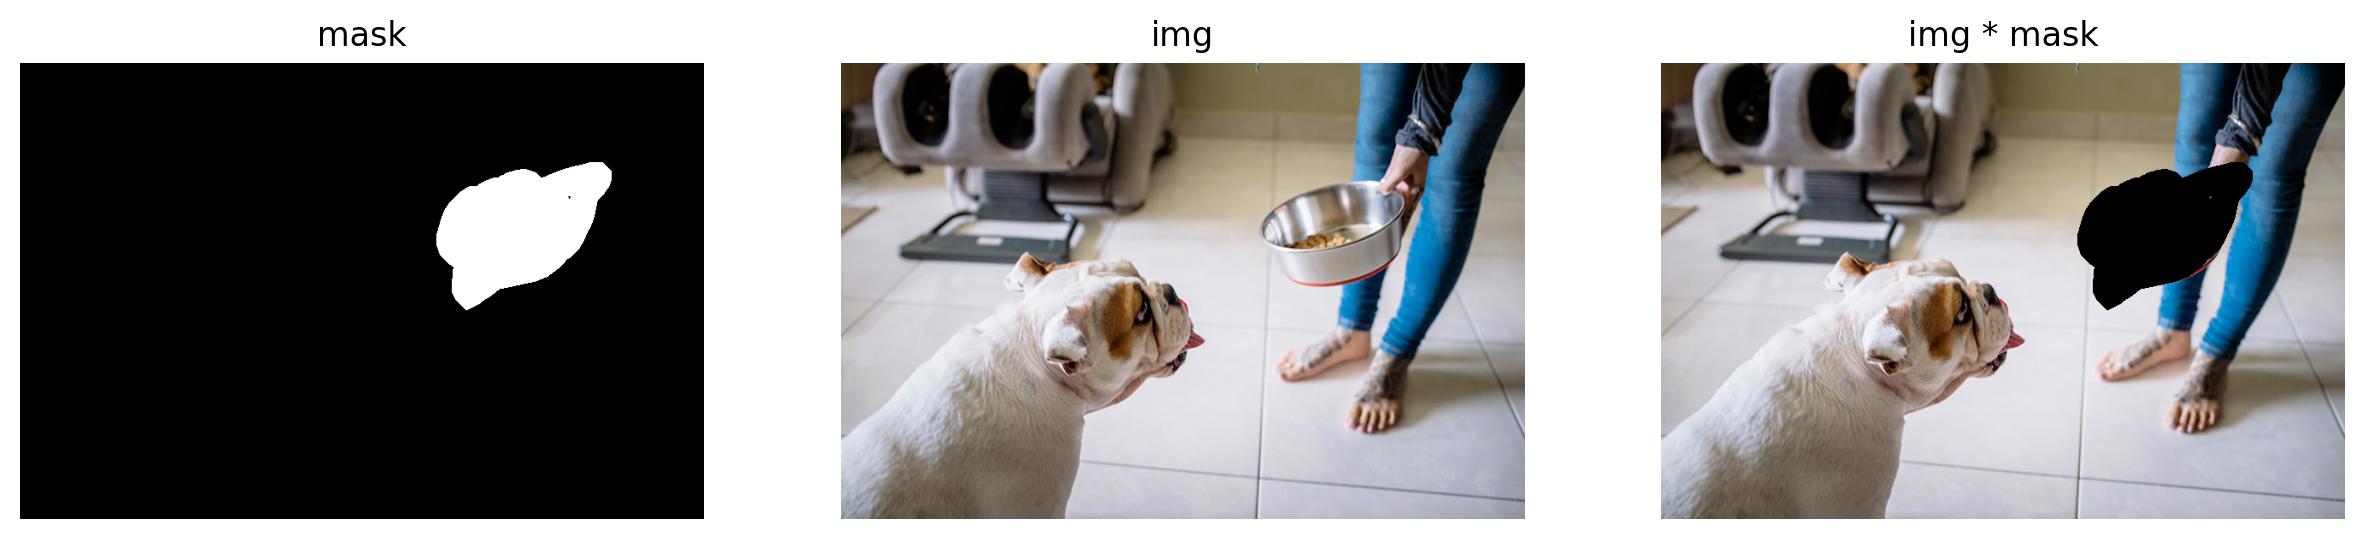

Run inpainting
Traceback (most recent call last):
  File "/content/drive/MyDrive/lama/bin/predict.py", line 32, in <module>
    from saicinpainting.training.trainers import load_checkpoint
  File "/content/drive/MyDrive/lama/saicinpainting/training/trainers/__init__.py", line 3, in <module>
    from saicinpainting.training.trainers.default import DefaultInpaintingTrainingModule
  File "/content/drive/MyDrive/lama/saicinpainting/training/trainers/default.py", line 10, in <module>
    from saicinpainting.training.modules.fake_fakes import FakeFakesGenerator
  File "/content/drive/MyDrive/lama/saicinpainting/training/modules/fake_fakes.py", line 2, in <module>
    from kornia import SamplePadding
ImportError: cannot import name 'SamplePadding' from 'kornia' (/usr/local/lib/python3.10/dist-packages/kornia/__init__.py)


IndexError: ignored

In [ ]:
import base64, os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode


canvas_html = """
<style>
.button {
  background-color: #4CAF50;
  border: none;
  color: white;
  padding: 15px 32px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
}
</style>
<canvas1 width=%d height=%d>
</canvas1>
<canvas width=%d height=%d>
</canvas>

<button class="button">Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')

var canvas1 = document.querySelector('canvas1')
var ctx1 = canvas.getContext('2d')


ctx.strokeStyle = 'red';

var img = new Image();
img.src = "data:image/%s;charset=utf-8;base64,%s";
console.log(img)
img.onload = function() {
  ctx1.drawImage(img, 0, 0);
};
img.crossOrigin = 'Anonymous';

ctx.clearRect(0, 0, canvas.width, canvas.height);

ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}

canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}

var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(imgm, filename='drawing.png', w=400, h=200, line_width=1):
  display(HTML(canvas_html % (w, h, w,h, filename.split('.')[-1], imgm, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

fname = '/content/drive/MyDrive/Sample_Test_Images/dog.jpg'
image64 = base64.b64encode(open(fname, 'rb').read())
image64 = image64.decode('utf-8')

print(f'Will use {fname} for inpainting')
img = np.array(plt.imread(f'{fname}')[:,:,:3])


draw(image64, filename=f"./{fname.split('.')[1]}_mask.png", w=img.shape[1], h=img.shape[0], line_width=0.04*img.shape[1])
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['figure.dpi'] = 200
plt.subplot(131)
with_mask = np.array(plt.imread(f"./{fname.split('.')[1]}_mask.png")[:,:,:3])
mask = (with_mask[:,:,0]==1)*(with_mask[:,:,1]==0)*(with_mask[:,:,2]==0)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title('mask')
plt.imsave(f"./{fname.split('.')[1]}_mask.png",mask, cmap='gray')

plt.subplot(132)
img = np.array(plt.imread(f'{fname}')[:,:,:3])
plt.imshow(img)
plt.axis('off')
plt.title('img')

plt.subplot(133)
img = np.array((1-mask.reshape(mask.shape[0], mask.shape[1], -1))*plt.imread(fname)[:,:,:3])
_=plt.imshow(img)
_=plt.axis('off')
_=plt.title('img * mask')
plt.show()

print('Run inpainting')
if '.jpeg' in fname:
  !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=/content/output dataset.img_suffix=.jpeg > /dev/null
elif '.jpg' in fname:
  !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=/content/output  dataset.img_suffix=.jpg > /dev/null
elif '.png' in fname:
  !PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=/content/output  dataset.img_suffix=.png > /dev/null
else:
  print(f'Error: unknown suffix .{fname.split(".")[-1]} use [.png, .jpeg, .jpg]')

plt.rcParams['figure.dpi'] = 200
plt.imshow(plt.imread(f"/content/output/{fname.split('.')[1].split('/')[2]}_mask.png"))
_=plt.axis('off')
_=plt.title('inpainting result')
plt.show()
fname = None



After this we have tried few other algorithms, till here masking is done, and would be trying lama above this


In [ ]:
print(scores)

[0.8774524  0.7613113  0.86457896]


In [ ]:
print(logits)

[[[ -8.658326   -8.878912   -8.678572  ...  -6.8752255  -7.077649
    -6.886905 ]
  [ -8.953767   -8.983778   -8.717871  ...  -6.957331   -7.1921616
    -6.9003873]
  [ -8.641141   -8.606724   -8.719398  ...  -6.412568   -6.861087
    -6.568677 ]
  ...
  [-11.407186  -11.367552  -11.28163   ... -10.9178    -10.655281
   -10.064989 ]
  [-10.3953905 -10.592324  -10.629881  ... -10.291324  -10.20579
    -9.285857 ]
  [-10.796516  -10.414939  -10.249097  ...  -9.899513   -9.535967
    -9.461928 ]]

 [[-11.713699  -12.296341  -11.97211   ... -11.468706  -11.922496
   -11.524368 ]
  [-12.147576  -12.151602  -12.154857  ... -12.3209505 -12.941364
   -12.314667 ]
  [-11.822256  -11.99605   -12.0581255 ... -11.387212  -12.2835655
   -11.888334 ]
  ...
  [-14.272378  -14.529785  -14.668045  ... -14.605029  -14.414274
   -14.232625 ]
  [-13.306792  -13.308797  -13.6679535 ... -13.310259  -13.463658
   -13.118728 ]
  [-13.391429  -13.115891  -13.548067  ... -12.958761  -13.06779
   -13.11421  ]]



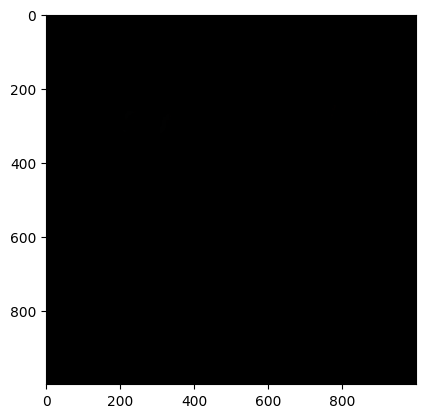

In [ ]:
from google.colab.patches import cv2_imshow

# Load the masked image generated by SAM
masked_image = cv2.imread('/content/drive/MyDrive/output1.png')

# Convert the masked image to grayscale
gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary mask
_, binary_mask = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
inverted_mask = cv2.bitwise_not(binary_mask)

# Apply the inverted mask to the masked image to remove the masked part
removed_masked_part = cv2.bitwise_and(masked_image, masked_image, mask=inverted_mask)

# Display the binary mask
plt.imshow(removed_masked_part)
plt.show()

In [ ]:
# Load the masked image and corresponding mask
masked_image = cv2.imread('/content/drive/MyDrive/output.png')
mask = cv2.imread('mask.jpg', 0)  # Assuming the mask is a grayscale image

# Convert the mask to a binary mask (0s and 255s)
_, binary_mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

# Invert the binary mask
inverted_mask = cv2.bitwise_not(binary_mask)

# Apply the inverted mask to the masked image
blended_image = cv2.bitwise_and(masked_image, masked_image, mask=inverted_mask)

# Display the blended image
cv2.imshow('Blended Image', blended_image)

In [ ]:
import cv2
import numpy as np

def inpaint_mask_with_background(image_path, mask_path, output_path):
    # Load the image and mask
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, 0)

    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Inpaint the mask based on the original image's background
    inpainted_mask = cv2.inpaint(image, mask, 1, cv2.INPAINT_TELEA)

    # Save the inpainted mask
    cv2.imwrite(output_path, inpainted_mask)

# Usage example
image_path = '/content/drive/MyDrive/Sample_Test_Images/dog.jpg'
mask_path = '/content/drive/MyDrive/output1.png'
output_path = '/content/drive/MyDrive/output4.png'

inpaint_mask_with_background(image_path, mask_path, output_path)